## All Visualizations

#### Load CSV

In [1]:
import pandas as pd
import ast
import numpy as np
import glob

import os

In [2]:
ROOT_DIR = "results"

In [3]:
xgb_files = glob.glob("xgboost_*.csv", root_dir=ROOT_DIR)
rsf_files = glob.glob("results_rsf_*.csv", root_dir=ROOT_DIR)
aft_files = glob.glob("aft_*.csv", root_dir=ROOT_DIR)

In [4]:
def clean_column_values(df):
    for col in ['hyperparams', 'c_index', 'brier_score', 'mae']:
        if col in df.columns:
            df[col] = df[col].apply(
                lambda x: [float(i) for i in ast.literal_eval(x.replace("np.float64", ""))]
                if '[' in x else ast.literal_eval(x)
            )

    return df

#### XGBOOST_AFT

In [5]:
xgb_files

['xgboost_extreme_nhanes.csv',
 'xgboost_extreme_support.csv',
 'xgboost_logistic_nhanes.csv',
 'xgboost_logistic_support.csv',
 'xgboost_normal_nhanes.csv',
 'xgboost_normal_support.csv']

In [6]:
xgb_dfs = pd.DataFrame()
for file in xgb_files:
    base = os.path.basename(file)
    parts = base.replace(".csv", "").split("_")
    model = parts[0]
    function = parts[1]
    dataset = parts[2]

    dir = os.path.join(ROOT_DIR, file)

    df = pd.read_csv(dir)
    df = clean_column_values(df)
    df['model'] = model
    df['function'] = function
    df['dataset'] = dataset
    xgb_dfs = pd.concat([xgb_dfs, df], ignore_index=True)
    
xgb_dfs

,hyperparams,c_index,brier_score,mae,mean_c_index,mean_brier_score,mean_mae,c_index_test,brier_score_test,mae_test,model,function,dataset
0,"{'max_depth': 6, 'sigma': 0.1, 'learning_rate'...","[0.7877335523073423, 0.7953706494565699, 0.790...","[0.15511356008339794, 0.15677408303390772, 0.1...","[5.074152799102182, 4.768334377078669, 4.99750...",0.789763,0.156355,4.923166e+00,0.783740,0.162853,4.922962e+00,xgboost,extreme,nhanes
1,"{'max_depth': 10, 'sigma': 0.1, 'learning_rate...","[0.7935179345494, 0.805381819471286, 0.7969897...","[0.15860059986555888, 0.1590546767213664, 0.16...","[3.8946708782083097, 3.5658027258228677, 3.901...",0.782341,0.296389,6.673613e+00,0.793779,0.160860,3.672236e+00,xgboost,extreme,nhanes
2,"{'max_depth': 6, 'sigma': 0.1, 'learning_rate'...","[0.7936316953020144, 0.808149855499016, 0.7920...","[0.1510730038152277, 0.1516317889308493, 0.157...","[4.323322359886975, 4.146340810852563, 4.33009...",0.798298,0.151213,4.206531e+00,0.789456,0.155730,4.244726e+00,xgboost,extreme,nhanes
3,"{'max_depth': 3, 'sigma': 0.05, 'learning_rate...","[0.7155240072243636, 0.7419879080158153, 0.713...","[0.8241373360738528, 0.8418977016550324, 0.832...","[17.764871527861594, 18.219898816176443, 18.00...",0.683676,0.828006,1.790456e+01,0.737004,0.837666,1.821157e+01,xgboost,extreme,nhanes
4,"{'max_depth': 6, 'sigma': 0.01, 'learning_rate...","[0.7604028094088665, 0.7745341394656123, 0.766...","[0.1590607766378933, 0.14184435963746617, 0.14...","[3.508483618536781, 2.8698248902956647, 3.0305...",0.768155,0.149057,3.106664e+00,0.772661,0.146339,3.099763e+00,xgboost,extreme,nhanes
5,"{'max_depth': 10, 'sigma': 0.01, 'learning_rat...","[0.7306293600568582, 0.7546937111044131, 0.734...","[0.19584229175053558, 0.1812646617171127, 0.20...","[5.287263751104589, 4.310136809605081, 7.14291...",0.737987,0.195151,5.598230e+00,0.747748,0.175601,4.226620e+00,xgboost,extreme,nhanes
6,"{'max_depth': 10, 'sigma': 0.01, 'learning_rat...","[0.7297996847307873, 0.7451555823478307, 0.723...","[0.8443348224803849, 0.8419244239039769, 0.842...","[18.379404093363743, 18.3916649988967, 18.3465...",0.675454,0.846182,1.839868e+01,0.735238,0.837684,1.838334e+01,xgboost,extreme,nhanes
7,"{'max_depth': 3, 'sigma': 0.01, 'learning_rate...","[0.729507315891006, 0.7510285278629811, 0.7765...","[0.7838457282322814, 0.8318367926086802, 0.138...","[17.028821414886878, 17.99452542807965, 2.7646...",0.757209,0.531717,1.146526e+01,0.787509,0.128562,2.712272e+00,xgboost,extreme,nhanes
8,"{'max_depth': 10, 'sigma': 0.05, 'learning_rat...","[0.779537590332337, 0.7862293221751387, 0.7831...","[0.1729033543453262, 0.1734256372507942, 0.172...","[3.9503520176401854, 3.8131025548749333, 3.876...",0.782740,0.171498,3.837823e+00,0.780334,0.171302,3.846013e+00,xgboost,extreme,nhanes
9,"{'max_depth': 10, 'sigma': 0.1, 'learning_rate...","[0.7863817632990766, 0.7996035531284906, 0.788...","[0.16501835910671797, 0.16445146389485155, 0.1...","[4.643855064880243, 4.053251255225283, 4.47563...",0.790858,0.167668,4.454307e+00,0.786480,0.166629,4.159141e+00,xgboost,extreme,nhanes


#### RSF

In [7]:
rsf_files

['results_rsf_nhanes.csv', 'results_rsf_support.csv']

In [8]:
rsf_dfs = pd.DataFrame()
for file in rsf_files:
    base = os.path.basename(file)
    dataset = base.replace('results_rsf_', '').replace('.csv', '')
    model = 'rsf'
    function = None

    dir = os.path.join(ROOT_DIR, file)

    df = pd.read_csv(dir)
    df = clean_column_values(df)
    df['model'] = model
    df['function'] = function
    df['dataset'] = dataset
    rsf_dfs = pd.concat([rsf_dfs, df], ignore_index=True)

In [9]:
rsf_dfs

,hyperparams,c_index,brier_score,mae,mean_c_index,mean_brier_score,mean_mae,c_index_test,brier_score_test,mae_test,model,function,dataset
0,"{'n_trees': 100, 'max_depth': 15, 'min_samples...","[0.7632775843886156, 0.7760709916490842, 0.756...","[0.14630151928098523, 0.1486180572153797, 0.15...","[3.15920966688439, 3.1301454138702467, 3.26393...",0.765962,0.146786,3.148516,0.771542,0.146522,3.165434,rsf,None,nhanes
1,"{'n_trees': 10, 'max_depth': 10, 'min_samples_...","[0.745571297606281, 0.7720990762575132, 0.7559...","[0.1401532041401287, 0.14539400099449784, 0.14...","[3.0991182233834103, 3.11761744966443, 3.22530...",0.755234,0.143580,3.122728,0.757181,0.143934,3.134753,rsf,None,nhanes
2,"{'n_trees': 100, 'max_depth': 15, 'min_samples...","[0.7602734852959595, 0.7704296023120157, 0.751...","[0.14668251073882702, 0.1481122582882692, 0.15...","[3.1771173524929246, 3.138199105145415, 3.2589...",0.762615,0.146473,3.153189,0.765064,0.145930,3.154895,rsf,None,nhanes
3,"{'n_trees': 20, 'max_depth': 5, 'min_samples_s...","[0.7269830870740364, 0.7239942554210032, 0.730...","[0.13528469328126277, 0.13264581558254837, 0.1...","[3.062159808404094, 2.9942393736017907, 3.1103...",0.731249,0.134256,3.033446,0.732769,0.132803,3.005354,rsf,None,nhanes
4,"{'n_trees': 20, 'max_depth': 15, 'min_samples_...","[0.759245932960455, 0.7698806758745412, 0.7574...","[0.14648922395585676, 0.15232223511383072, 0.1...","[3.1476703679512306, 3.2038031319910525, 3.285...",0.761335,0.148902,3.178108,0.766756,0.149236,3.172446,rsf,None,nhanes
5,"{'n_trees': 100, 'max_depth': 5, 'min_samples_...","[0.7372930721554439, 0.756912111487385, 0.7419...","[0.13397218116226345, 0.1356757349046034, 0.13...","[3.0432179403440025, 3.026733780760627, 3.0631...",0.744766,0.133284,3.014853,0.743661,0.134389,3.038331,rsf,None,nhanes
6,"{'n_trees': 100, 'max_depth': 10, 'min_samples...","[0.7548737403868458, 0.7747915817095442, 0.750...","[0.14215437349771376, 0.14393707170910056, 0.1...","[3.1229044197692146, 3.1003914988814323, 3.214...",0.761367,0.142405,3.110390,0.762194,0.141411,3.104666,rsf,None,nhanes
7,"{'n_trees': 50, 'max_depth': 10, 'min_samples_...","[0.7515995058262551, 0.7711597312104396, 0.753...","[0.14262287894342263, 0.14497449801121204, 0.1...","[3.124210755497497, 3.1087248322147656, 3.2108...",0.760525,0.142555,3.111537,0.762993,0.142670,3.121664,rsf,None,nhanes
8,"{'n_trees': 20, 'max_depth': 15, 'min_samples_...","[0.7523228315236604, 0.7649481392173898, 0.755...","[0.14724254858922667, 0.15130058011755426, 0.1...","[3.1710755497496197, 3.170469798657719, 3.2531...",0.757026,0.148542,3.175194,0.759457,0.148017,3.167262,rsf,None,nhanes
9,"{'n_trees': 20, 'max_depth': 15, 'min_samples_...","[0.7561632759539414, 0.7696381269835642, 0.758...","[0.14743098267858737, 0.15242307759431145, 0.1...","[3.168245155671675, 3.1695749440715892, 3.2787...",0.763819,0.148558,3.166063,0.760276,0.149519,3.195733,rsf,None,nhanes


In [10]:
aft_dfs = pd.DataFrame()
for file in aft_files:
    base = os.path.basename(file)
    parts = base.replace(".csv", "").split("_")
    model = parts[0] + "forest"
    function = parts[1]
    dataset = parts[2]

    dir = os.path.join(ROOT_DIR, file)

    df = pd.read_csv(dir)
    df = clean_column_values(df)
    df['model'] = model
    df['function'] = function
    df['dataset'] = dataset
    aft_dfs = pd.concat([aft_dfs, df], ignore_index=True)
    
aft_dfs

,hyperparams,c_index,brier_score,mae,mean_c_index,mean_brier_score,mean_mae,c_index_test,brier_score_test,mae_test,model,function,dataset
0,"{'max_depth': 10, 'min_samples_split': 200, 'm...","[0.27046415128179097, 0.27654722433999396, 0.7...","[0.14281406538698926, 0.1371686804345857, 0.14...","[3.0995170138733372, 3.0030945583867776, 3.106...",0.394416,0.143443,3.077446,0.698529,0.144109,3.161010,aftforest,extreme,nhanes
1,"{'max_depth': 5, 'min_samples_split': 100, 'mi...","[0.2695140451915516, 0.7116880906366908, 0.475...","[0.1475545416277011, 0.13885789785196534, 0.14...","[3.1370476928184865, 3.0347476022466546, 3.106...",0.474494,0.145438,3.101143,0.712668,0.144066,3.074382,aftforest,extreme,nhanes
2,"{'max_depth': 5, 'min_samples_split': 50, 'min...","[0.5330172983044089, 0.526886402723356, 0.5359...","[0.14946044548183915, 0.14011176666186811, 0.1...","[3.1516794350091812, 3.032828128754029, 3.1267...",0.468170,0.146051,3.104472,0.515914,0.144066,3.183114,aftforest,extreme,nhanes
3,"{'max_depth': 10, 'min_samples_split': 100, 'm...","[0.3693937626498622, 0.7737852165741742, 0.405...","[0.14797926518341917, 0.1391375409025905, 0.14...","[3.11854843068411, 3.024628996528277, 3.130053...",0.523034,0.144676,3.088212,0.762231,0.144066,3.066196,aftforest,extreme,nhanes
4,"{'max_depth': 10, 'min_samples_split': 2, 'min...","[0.43996322600296595, 0.55335791918583, 0.3689...","[0.14860524137424796, 0.13999161148270653, 0.1...","[3.129083375458353, 3.0305469640550924, 3.1277...",0.507628,0.144833,3.092383,0.757798,0.144066,3.087197,aftforest,extreme,nhanes
5,"{'max_depth': 15, 'min_samples_split': 10, 'mi...","[0.28751307136986476, 0.7660637222744278, 0.52...","[0.14493916725828007, 0.14064101624392353, 0.1...","[3.10671180796023, 3.0350336651747303, 3.09435...",0.466150,0.143904,3.079527,0.742454,0.144066,3.076383,aftforest,extreme,nhanes
6,"{'max_depth': 5, 'min_samples_split': 100, 'mi...","[0.51119302049991, 0.270553004379355, 0.689345...","[0.14927191167223997, 0.14475937486162344, 0.1...","[3.141530232804413, 3.057473468227662, 3.10304...",0.587860,0.146067,3.098085,0.751964,0.144784,3.168274,aftforest,extreme,nhanes
7,"{'max_depth': 10, 'min_samples_split': 200, 'm...","[0.7482937739888819, 0.34269179624474744, 0.60...","[0.1489066137337852, 0.1424982614324632, 0.147...","[3.137157146094035, 3.064258071103512, 3.13525...",0.480051,0.146110,3.105214,0.747425,0.144066,3.168618,aftforest,extreme,nhanes
8,"{'max_depth': 5, 'min_samples_split': 100, 'mi...","[0.7275215052289185, 0.7153330614705413, 0.558...","[0.14330079437864285, 0.13784333181052535, 0.1...","[3.1065919153309323, 3.0062895642200957, 3.132...",0.671774,0.143115,3.080671,0.728051,0.144089,3.138085,aftforest,extreme,nhanes
9,"{'max_depth': 10, 'min_samples_split': 2, 'min...","[0.6587207066062017, 0.7389556922749597, 0.698...","[0.15550835822012507, 0.14065746743350493, 0.1...","[3.3122573027992646, 3.0116412156212116, 3.168...",0.685167,0.147307,3.146021,0.720764,0.140960,3.049815,aftforest,extreme,nhanes


In [11]:
dfs = pd.concat([xgb_dfs, rsf_dfs, aft_dfs], ignore_index=True)

#### AFT-FOREST

### Experiment 1

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

### Experiment 2

### Experiment 3

### BoxPlot

In [13]:
dfs_nhanes = dfs[dfs['dataset'] == 'nhanes']

In [14]:
dfs_nhanes

,hyperparams,c_index,brier_score,mae,mean_c_index,mean_brier_score,mean_mae,c_index_test,brier_score_test,mae_test,model,function,dataset
0,"{'max_depth': 6, 'sigma': 0.1, 'learning_rate'...","[0.7877335523073423, 0.7953706494565699, 0.790...","[0.15511356008339794, 0.15677408303390772, 0.1...","[5.074152799102182, 4.768334377078669, 4.99750...",0.789763,0.156355,4.923166,0.783740,0.162853,4.922962,xgboost,extreme,nhanes
1,"{'max_depth': 10, 'sigma': 0.1, 'learning_rate...","[0.7935179345494, 0.805381819471286, 0.7969897...","[0.15860059986555888, 0.1590546767213664, 0.16...","[3.8946708782083097, 3.5658027258228677, 3.901...",0.782341,0.296389,6.673613,0.793779,0.160860,3.672236,xgboost,extreme,nhanes
2,"{'max_depth': 6, 'sigma': 0.1, 'learning_rate'...","[0.7936316953020144, 0.808149855499016, 0.7920...","[0.1510730038152277, 0.1516317889308493, 0.157...","[4.323322359886975, 4.146340810852563, 4.33009...",0.798298,0.151213,4.206531,0.789456,0.155730,4.244726,xgboost,extreme,nhanes
3,"{'max_depth': 3, 'sigma': 0.05, 'learning_rate...","[0.7155240072243636, 0.7419879080158153, 0.713...","[0.8241373360738528, 0.8418977016550324, 0.832...","[17.764871527861594, 18.219898816176443, 18.00...",0.683676,0.828006,17.904565,0.737004,0.837666,18.211571,xgboost,extreme,nhanes
4,"{'max_depth': 6, 'sigma': 0.01, 'learning_rate...","[0.7604028094088665, 0.7745341394656123, 0.766...","[0.1590607766378933, 0.14184435963746617, 0.14...","[3.508483618536781, 2.8698248902956647, 3.0305...",0.768155,0.149057,3.106664,0.772661,0.146339,3.099763,xgboost,extreme,nhanes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,"{'max_depth': 15, 'min_samples_split': 10, 'mi...","[0.2743379457698416, 0.7694643711990922, 0.634...","[0.1463234334233606, 0.13937263701928074, 0.14...","[3.1132735357603476, 3.0295367102332573, 3.087...",0.529643,0.144263,3.079419,0.760571,0.144066,3.070465,aftforest,normal,nhanes
106,"{'max_depth': 5, 'min_samples_split': 100, 'mi...","[0.6837758638961909, 0.7059623056328789, 0.584...","[0.14933839283937986, 0.13924920734218382, 0.1...","[3.1360129391462492, 3.028446813746436, 3.1444...",0.609188,0.145373,3.100394,0.709743,0.144066,3.068497,aftforest,normal,nhanes
107,"{'max_depth': 10, 'min_samples_split': 200, 'm...","[0.6199079093738119, 0.2786071168950905, 0.250...","[0.1478294123970522, 0.1426085321735894, 0.147...","[3.122846573336962, 3.041958699691874, 3.13273...",0.425501,0.146169,3.098918,0.639658,0.144788,3.154471,aftforest,normal,nhanes
108,"{'max_depth': 5, 'min_samples_split': 100, 'mi...","[0.6716983257529887, 0.38479317742593216, 0.73...","[0.1494119406309239, 0.14248344888143483, 0.14...","[3.13648474711407, 3.040228899265079, 3.105589...",0.508216,0.146243,3.091421,0.736647,0.144184,3.160032,aftforest,normal,nhanes


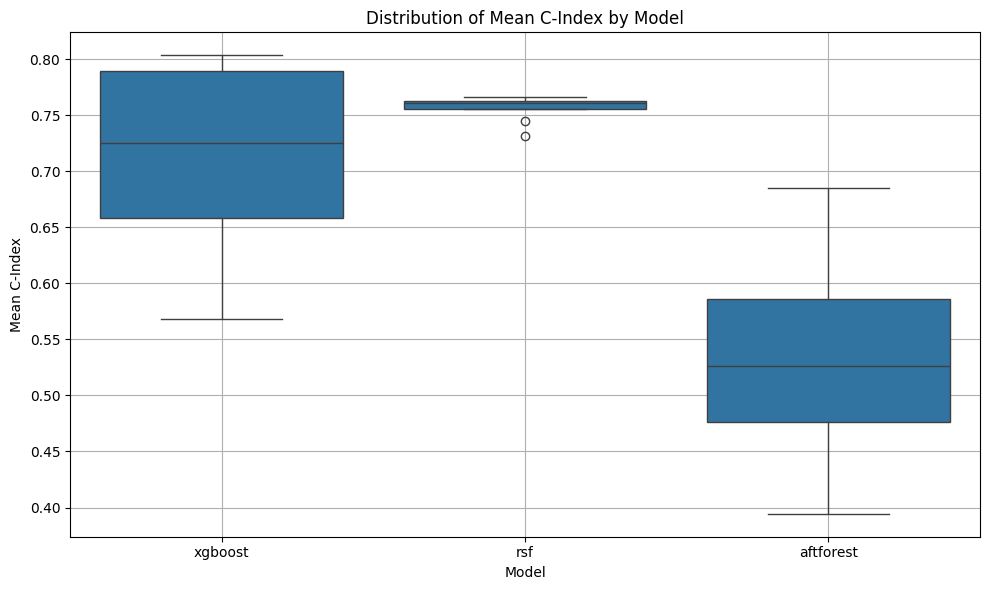

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfs_nhanes, x='model', y='mean_c_index')
plt.title('Distribution of Mean C-Index by Model')
plt.ylabel('Mean C-Index')
plt.xlabel('Model')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
dfs_support = dfs[dfs['dataset'] == 'support']

In [17]:
dfs_support

,hyperparams,c_index,brier_score,mae,mean_c_index,mean_brier_score,mean_mae,c_index_test,brier_score_test,mae_test,model,function,dataset
10,"{'max_depth': 6, 'sigma': 0.1, 'learning_rate'...","[0.5, 0.5, 0.5, 0.5, 0.5]","[0.36873747395885853, 0.3562302081177765, 0.34...","[220.54204334283486, 187.66815354468974, 193.2...",0.500000,0.354825,2.024932e+02,0.500000,0.365360,2.129511e+02,xgboost,extreme,support
11,"{'max_depth': 10, 'sigma': 0.1, 'learning_rate...","[0.5, 0.5, 0.5, 0.5, 0.5]","[0.36873747395885853, 0.3562302081177765, 0.34...","[221.48596544528618, 188.61207564714107, 194.1...",0.500000,0.354825,2.034371e+02,0.500000,0.365360,2.138950e+02,xgboost,extreme,support
12,"{'max_depth': 6, 'sigma': 0.1, 'learning_rate'...","[0.5, 0.5, 0.5, 0.5, 0.5]","[0.36873747395885853, 0.3562302081177765, 0.34...","[221.17748291755333, 188.30359311940822, 193.8...",0.500000,0.354825,2.031287e+02,0.500000,0.365360,2.135865e+02,xgboost,extreme,support
13,"{'max_depth': 3, 'sigma': 0.05, 'learning_rate...","[0.5, 0.5, 0.5, 0.5, 0.5]","[0.36873747395885853, 0.3562302081177765, 0.34...","[221.48596431279793, 188.61207451465282, 194.1...",0.500000,0.354825,2.034371e+02,0.500000,0.365360,2.138950e+02,xgboost,extreme,support
14,"{'max_depth': 6, 'sigma': 0.01, 'learning_rate...","[0.5, 0.5, 0.5, 0.5, 0.5]","[0.36873747395885853, 0.3562302081177765, 0.34...","[220.61530055070534, 187.74141075256023, 193.3...",0.500000,0.354825,2.025665e+02,0.500000,0.365360,2.130243e+02,xgboost,extreme,support
15,"{'max_depth': 10, 'sigma': 0.01, 'learning_rat...","[0.5, 0.5, 0.5, 0.5, 0.5]","[0.36873747395885853, 0.3562302081177765, 0.34...","[220.6152792122425, 187.7413894140974, 193.327...",0.500000,0.354825,2.025665e+02,0.500000,0.365360,2.130243e+02,xgboost,extreme,support
16,"{'max_depth': 10, 'sigma': 0.01, 'learning_rat...","[0.5, 0.5, 0.5, 0.5, 0.5]","[0.36873747395885853, 0.3562302081177765, 0.34...","[221.4859635975422, 188.61207379939708, 194.19...",0.500000,0.354825,2.034371e+02,0.500000,0.365360,2.138950e+02,xgboost,extreme,support
17,"{'max_depth': 3, 'sigma': 0.01, 'learning_rate...","[0.5, 0.5, 0.5, 0.5, 0.5]","[0.36873747395885853, 0.3562302081177765, 0.34...","[221.17747612262383, 188.30358632447872, 193.8...",0.500000,0.354825,2.031287e+02,0.500000,0.365360,2.135865e+02,xgboost,extreme,support
18,"{'max_depth': 10, 'sigma': 0.05, 'learning_rat...","[0.5, 0.5, 0.5, 0.5, 0.5]","[0.36873747395885853, 0.3562302081177765, 0.34...","[221.17748291755333, 188.30359311940822, 193.8...",0.500000,0.354825,2.031287e+02,0.500000,0.365360,2.135865e+02,xgboost,extreme,support
19,"{'max_depth': 10, 'sigma': 0.1, 'learning_rate...","[0.5, 0.5, 0.5, 0.5, 0.5]","[0.36873747395885853, 0.3562302081177765, 0.34...","[221.17748351359978, 188.30359371545467, 193.8...",0.500000,0.354825,2.031287e+02,0.500000,0.365360,2.135865e+02,xgboost,extreme,support


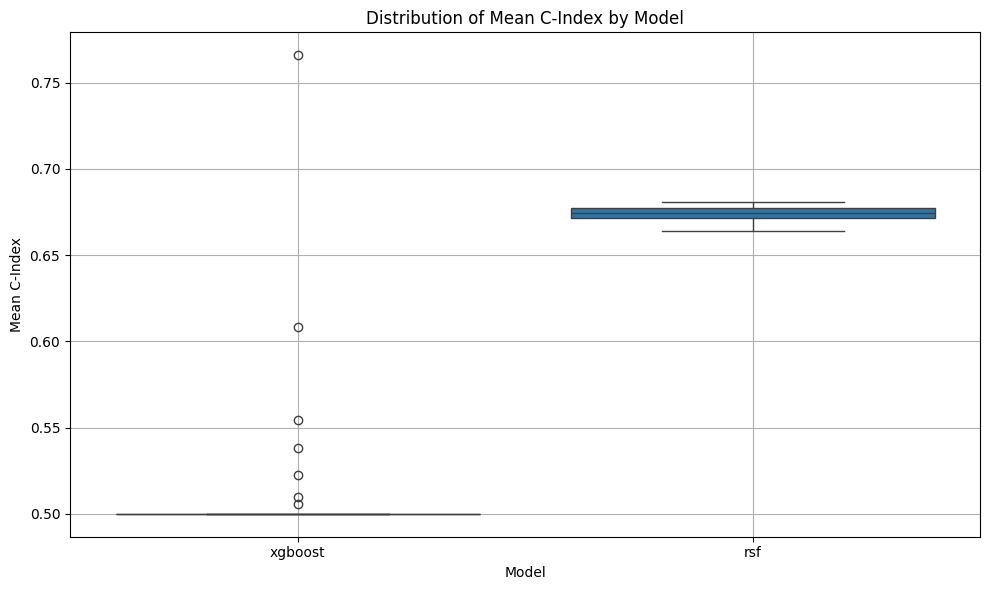

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfs_support, x='model', y='mean_c_index')
plt.title('Distribution of Mean C-Index by Model')
plt.ylabel('Mean C-Index')
plt.xlabel('Model')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_234066/2362148693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_support['model_function'] = dfs_support.apply(lambda row: f"{row['model']}_{row['function']}" if row['function'] else row['model'], axis=1)


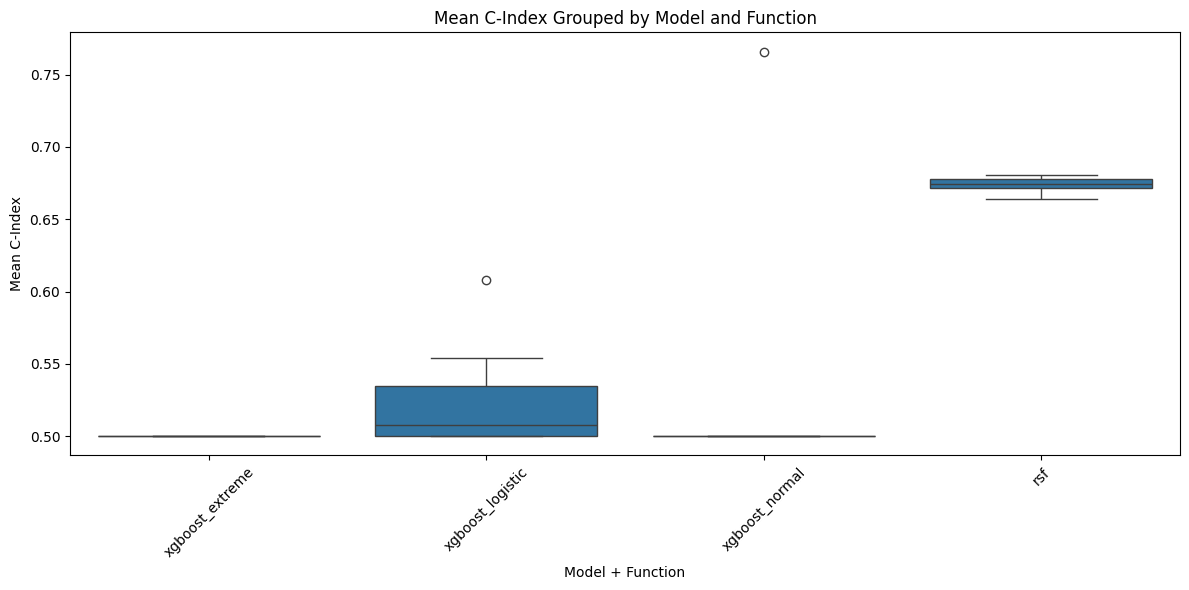

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column that combines model and function
dfs_support['model_function'] = dfs_support.apply(lambda row: f"{row['model']}_{row['function']}" if row['function'] else row['model'], axis=1)

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=dfs_support, x='model_function', y='mean_c_index')
plt.title('Mean C-Index Grouped by Model and Function')
plt.xlabel('Model + Function')
plt.ylabel('Mean C-Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_234066/2908929564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_nhanes['model_function'] = dfs_nhanes.apply(lambda row: f"{row['model']}_{row['function']}" if row['function'] else row['model'], axis=1)


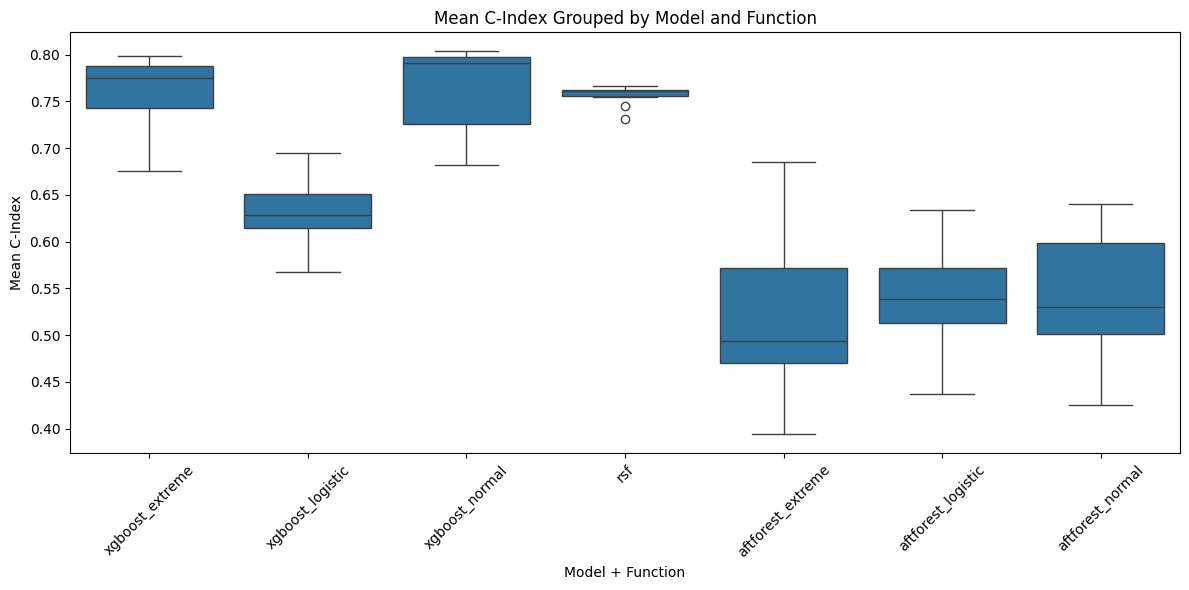

In [20]:
# Create a new column that combines model and function
dfs_nhanes['model_function'] = dfs_nhanes.apply(lambda row: f"{row['model']}_{row['function']}" if row['function'] else row['model'], axis=1)

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=dfs_nhanes, x='model_function', y='mean_c_index')
plt.title('Mean C-Index Grouped by Model and Function')
plt.xlabel('Model + Function')
plt.ylabel('Mean C-Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
dfs

,hyperparams,c_index,brier_score,mae,mean_c_index,mean_brier_score,mean_mae,c_index_test,brier_score_test,mae_test,model,function,dataset
0,"{'max_depth': 6, 'sigma': 0.1, 'learning_rate'...","[0.7877335523073423, 0.7953706494565699, 0.790...","[0.15511356008339794, 0.15677408303390772, 0.1...","[5.074152799102182, 4.768334377078669, 4.99750...",0.789763,0.156355,4.923166,0.783740,0.162853,4.922962,xgboost,extreme,nhanes
1,"{'max_depth': 10, 'sigma': 0.1, 'learning_rate...","[0.7935179345494, 0.805381819471286, 0.7969897...","[0.15860059986555888, 0.1590546767213664, 0.16...","[3.8946708782083097, 3.5658027258228677, 3.901...",0.782341,0.296389,6.673613,0.793779,0.160860,3.672236,xgboost,extreme,nhanes
2,"{'max_depth': 6, 'sigma': 0.1, 'learning_rate'...","[0.7936316953020144, 0.808149855499016, 0.7920...","[0.1510730038152277, 0.1516317889308493, 0.157...","[4.323322359886975, 4.146340810852563, 4.33009...",0.798298,0.151213,4.206531,0.789456,0.155730,4.244726,xgboost,extreme,nhanes
3,"{'max_depth': 3, 'sigma': 0.05, 'learning_rate...","[0.7155240072243636, 0.7419879080158153, 0.713...","[0.8241373360738528, 0.8418977016550324, 0.832...","[17.764871527861594, 18.219898816176443, 18.00...",0.683676,0.828006,17.904565,0.737004,0.837666,18.211571,xgboost,extreme,nhanes
4,"{'max_depth': 6, 'sigma': 0.01, 'learning_rate...","[0.7604028094088665, 0.7745341394656123, 0.766...","[0.1590607766378933, 0.14184435963746617, 0.14...","[3.508483618536781, 2.8698248902956647, 3.0305...",0.768155,0.149057,3.106664,0.772661,0.146339,3.099763,xgboost,extreme,nhanes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,"{'max_depth': 15, 'min_samples_split': 10, 'mi...","[0.2743379457698416, 0.7694643711990922, 0.634...","[0.1463234334233606, 0.13937263701928074, 0.14...","[3.1132735357603476, 3.0295367102332573, 3.087...",0.529643,0.144263,3.079419,0.760571,0.144066,3.070465,aftforest,normal,nhanes
106,"{'max_depth': 5, 'min_samples_split': 100, 'mi...","[0.6837758638961909, 0.7059623056328789, 0.584...","[0.14933839283937986, 0.13924920734218382, 0.1...","[3.1360129391462492, 3.028446813746436, 3.1444...",0.609188,0.145373,3.100394,0.709743,0.144066,3.068497,aftforest,normal,nhanes
107,"{'max_depth': 10, 'min_samples_split': 200, 'm...","[0.6199079093738119, 0.2786071168950905, 0.250...","[0.1478294123970522, 0.1426085321735894, 0.147...","[3.122846573336962, 3.041958699691874, 3.13273...",0.425501,0.146169,3.098918,0.639658,0.144788,3.154471,aftforest,normal,nhanes
108,"{'max_depth': 5, 'min_samples_split': 100, 'mi...","[0.6716983257529887, 0.38479317742593216, 0.73...","[0.1494119406309239, 0.14248344888143483, 0.14...","[3.13648474711407, 3.040228899265079, 3.105589...",0.508216,0.146243,3.091421,0.736647,0.144184,3.160032,aftforest,normal,nhanes


In [22]:
# Get best hyperparameters for each model and function
best_hyperparams = dfs.loc[dfs.groupby(['model','dataset'])['c_index_test'].idxmax()]

In [23]:
best_hyperparams

,hyperparams,c_index,brier_score,mae,mean_c_index,mean_brier_score,mean_mae,c_index_test,brier_score_test,mae_test,model,function,dataset
95,"{'max_depth': 15, 'min_samples_split': 10, 'mi...","[0.25691735781573427, 0.7954727753054024, 0.45...","[0.14885991112379693, 0.13921748580535404, 0.1...","[3.1147210566858914, 3.0333768503478398, 3.085...",0.581914,0.143952,3.080196,0.783913,0.144066,3.074613,aftforest,logistic,nhanes
60,"{'n_trees': 100, 'max_depth': 15, 'min_samples...","[0.7632775843886156, 0.7760709916490842, 0.756...","[0.14630151928098523, 0.1486180572153797, 0.15...","[3.15920966688439, 3.1301454138702467, 3.26393...",0.765962,0.146786,3.148516,0.771542,0.146522,3.165434,rsf,None,nhanes
72,"{'n_trees': 100, 'max_depth': 15, 'min_samples...","[0.6945234421679601, 0.6758699023256117, 0.671...","[0.401154148040389, 0.3756529813967721, 0.3913...","[735.7489626556016, 693.6446808510639, 734.581...",0.680599,0.393841,732.000397,0.681551,0.399604,724.823232,rsf,None,support
47,"{'max_depth': 3, 'sigma': 0.01, 'learning_rate...","[0.7928868773451575, 0.7441148206592082, 0.716...","[0.12193472703976421, 0.8318189679531389, 0.79...","[2.5132347610867316, 17.99510478730703, 17.099...",0.711962,0.539070,11.602768,0.799559,0.124211,2.550135,xgboost,normal,nhanes
50,"{'max_depth': 6, 'sigma': 0.1, 'learning_rate'...","[0.7780092041577402, 0.7534416188613169, 0.766...","[0.3601141184512211, 0.38533813728490923, 0.39...","[835.4078430449657, 902.4749102993455, 912.684...",0.765936,0.382961,892.139019,0.757315,0.373140,878.129188,xgboost,normal,support


### Calibration Plots

In [24]:
import sys
sys.path.append("src")

from wrapper.xgboost_aft.xgboost_aft import XGBoostAFTWrapper
from dataset.nhanes import NHANESDataset


best_xgboost_dir = "results/results_xgboost/xgboost_normal_nhanes/best_model_combi_10.pkl"
best_xgboost_model = XGBoostAFTWrapper.load(best_xgboost_dir)

In [25]:
data = NHANESDataset()
X_train, X_test, y_train, y_test = data.get_train_test()

X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = data.get_train_test_xgboost()

/mnt/c/Users/rizki/Master Files/ThesisUMCG/Survival-Tree-Analysis/src/dataset/nhanes.py:68: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data.replace({False: 0, True: 1}, inplace=True)


In [26]:
best_xgboost_model._score(X_test_xgboost, y_test_xgboost)

np.float64(0.7913487291921388)

In [27]:
y_pred = best_xgboost_model.predict(X_test_xgboost)

In [28]:
len(y_pred)

2853

In [29]:
y_pred

array([17.815508, 32.123596, 21.270464, ...,  7.218573, 14.283334,
       19.276148], dtype=float32)

In [30]:
from utils.metrics.metrics import mae

def plot_survival_trees(pred_times, y):
    """
    Plot the survival curves for the predicted and true survival times.
    Parameters:
    y_true: list of tuples (censored, time)
        The true survival times and censoring information.
    y_pred: list of tuples (censored, time)
        The predicted survival times and censoring information.
    """
    y_true = np.array([time for _, time in y])
    y_pred = np.array(pred_times)
    censored = np.array([not death for death, _ in y])

    print(f"y_true: {y_true.shape}, y_pred: {y_pred.shape}, censored: {censored.shape}")

    uncensored = ~censored

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.scatter(y_true[uncensored], y_pred[uncensored], alpha=0.6, label='Uncensored', color='blue', edgecolor='k')
    ax.scatter(y_true[censored], y_pred[censored], alpha=0.6, label='Censored', color='red', marker='x')

    lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
    ax.plot(lims, lims, 'r--', label='Perfect Prediction')

    mae_ = mae(y_pred, y)
    ax.set_title(f'True vs Predicted Survival Times\nMAE: {mae_:.2f}')
    ax.set_xlabel('True survival time (years)')
    ax.set_ylabel('Predicted survival time (years)')
    ax.grid(True, linestyle="--", alpha=0.7)
    ax.legend()
    plt.tight_layout()
    plt.show()

y_true: (2853,), y_pred: (2853,), censored: (2853,)


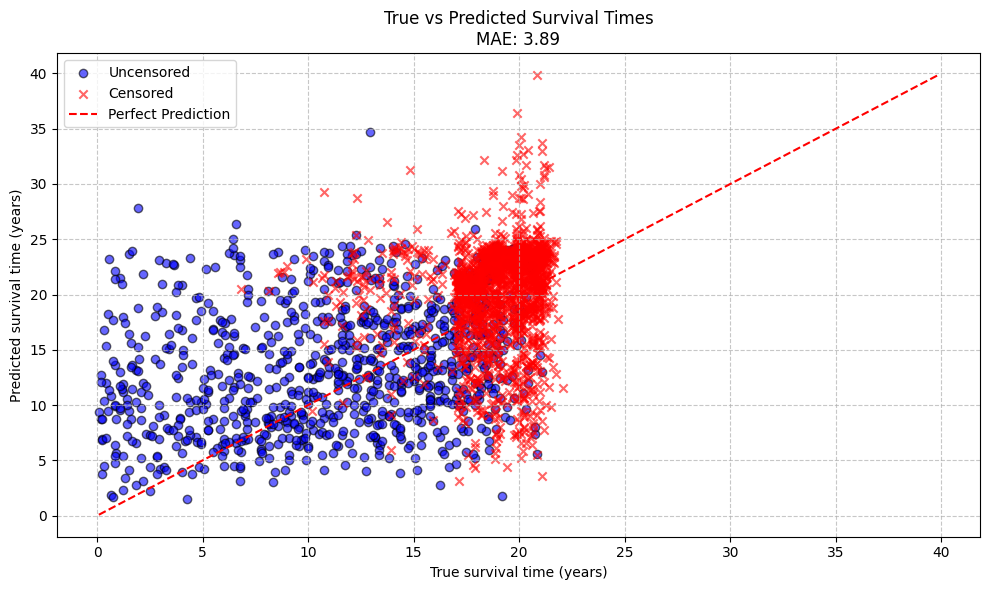

In [31]:
plot_survival_trees(y_pred, y_test)

In [32]:
best_xgboost_dir = "results/results_xgboost/xgboost_normal_support/best_model_combi_1.pkl"
best_xgboost_model = XGBoostAFTWrapper.load(best_xgboost_dir)

In [33]:
from dataset.support import SupportDataset

df = pd.read_csv('data/support2.csv')
data = SupportDataset(df)
X_train, X_test, y_train, y_test = data.get_train_test()

X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = data.get_train_test_xgboost()

/mnt/c/Users/rizki/Master Files/ThesisUMCG/Survival-Tree-Analysis/src/dataset/support.py:101: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data.replace({False: 0, True: 1}, inplace=True)


In [34]:
best_xgboost_model._score(X_test_xgboost, y_test_xgboost)

np.float64(0.7573149280784307)

In [35]:
y_pred = best_xgboost_model.predict(X_test_xgboost)

y_true: (1821,), y_pred: (1821,), censored: (1821,)


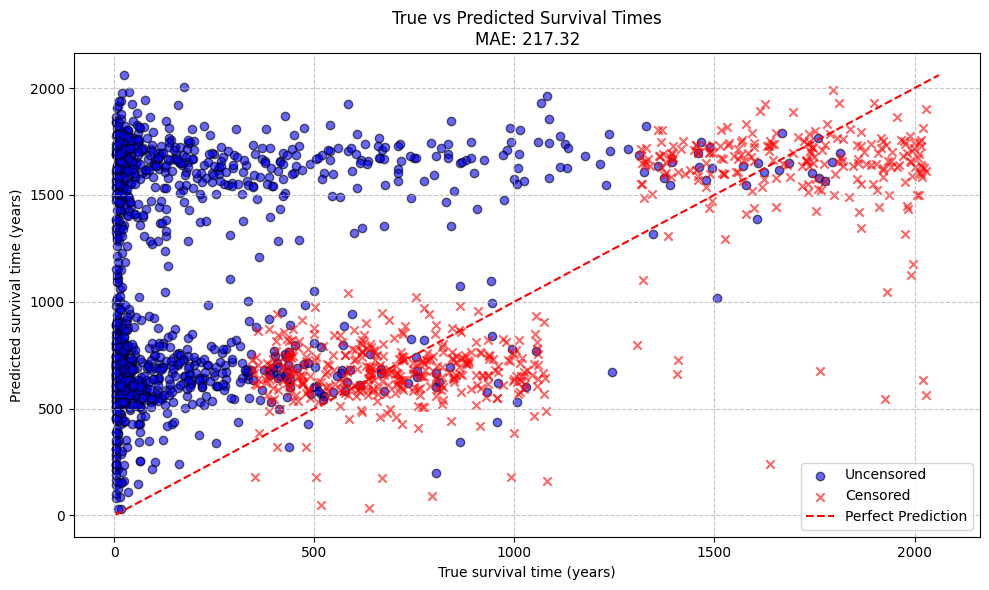

In [36]:
plot_survival_trees(y_pred, y_test)

In [37]:
from wrapper.random_survival_forest_scikit.random_survival_forest import RandomSurvivalForestWrapper

In [38]:
best_rsf_dir = "results/results_rsf/rsf_nhanes/tmp/results/best_model_combi_1.pkl"
best_rsf_model = RandomSurvivalForestWrapper.load(best_rsf_dir)

In [39]:
data = NHANESDataset()
X_train, X_test, y_train, y_test = data.get_train_test()

/mnt/c/Users/rizki/Master Files/ThesisUMCG/Survival-Tree-Analysis/src/dataset/nhanes.py:68: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data.replace({False: 0, True: 1}, inplace=True)


In [40]:
best_rsf_model._score(X_test, y_test)

np.float64(0.7715416583618672)

In [41]:
y_pred = best_rsf_model.predict(X_test)

y_true: (2853,), y_pred: (2853,), censored: (2853,)


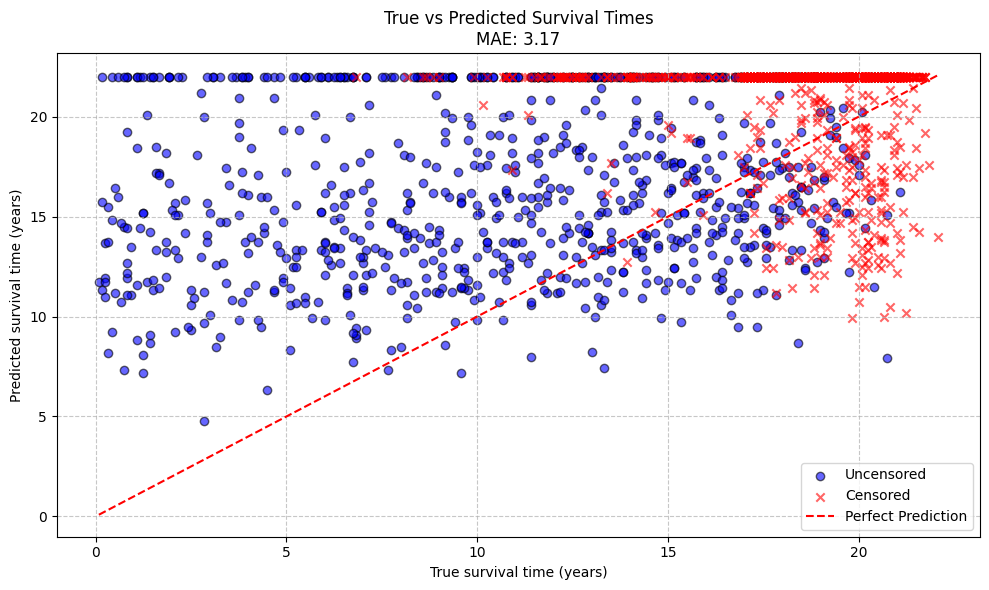

In [42]:
plot_survival_trees(y_pred, y_test)

In [43]:
from forest.forest import AFTForest

In [44]:
best_aft_dir = "results/results_aft/aft_extreme_nhanes/tmp/results/models/best_model_combi_4"
best_aft_model = AFTForest.load(best_aft_dir)

In [45]:
best_aft_model._score(X_test, y_test)

np.float64(0.7625794161949044)

In [46]:
y_pred = best_aft_model.predict(X_test)

y_true: (2853,), y_pred: (2853,), censored: (2853,)


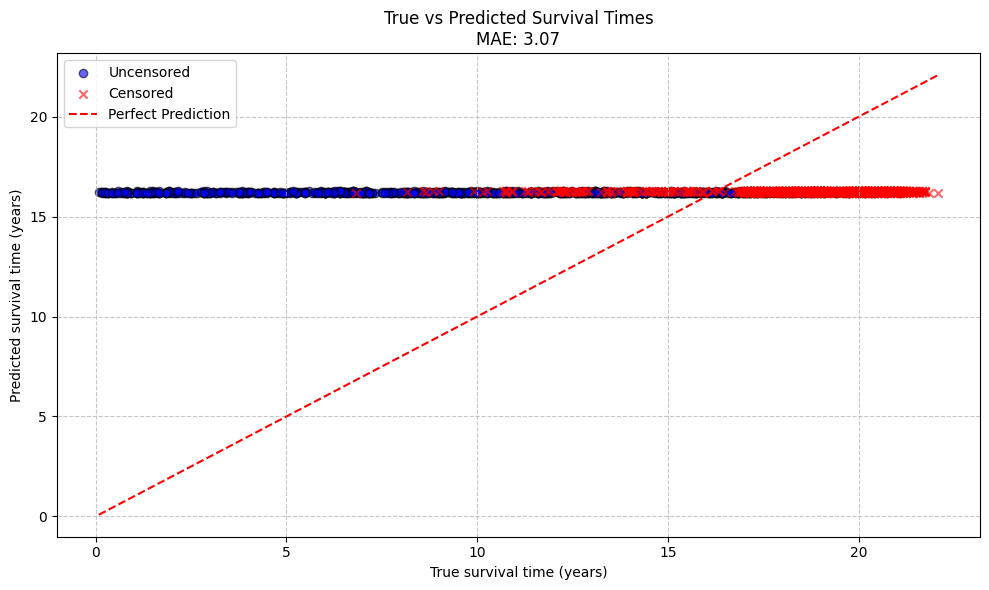

In [47]:
plot_survival_trees(y_pred, y_test)

In [48]:
from tree.tree import AFTSurvivalTree

In [49]:
best_tree_dir = 'calibration.json'
best_tree = AFTSurvivalTree.load(best_tree_dir)

In [50]:
best_tree._score(X_test, y_test)

np.float64(0.6957523057594157)

In [51]:
y_pred = best_tree.predict(X_test)

In [52]:
y_pred

[79.81823315629767,
 108.74741376235112,
 108.74741376235112,
 108.74741376235112,
 79.81823315629767,
 79.81823315629767,
 108.74741376235112,
 79.81823315629767,
 79.81823315629767,
 79.81823315629767,
 79.81823315629767,
 108.74741376235112,
 108.74741376235112,
 79.81823315629767,
 108.74741376235112,
 56.02677931132574,
 18.547236990991404,
 79.81823315629767,
 79.81823315629767,
 108.74741376235112,
 108.74741376235112,
 79.81823315629767,
 108.74741376235112,
 108.74741376235112,
 108.74741376235112,
 79.81823315629767,
 18.547236990991404,
 79.81823315629767,
 108.74741376235112,
 79.81823315629767,
 79.81823315629767,
 108.74741376235112,
 79.81823315629767,
 79.81823315629767,
 79.81823315629767,
 79.81823315629767,
 108.74741376235112,
 79.81823315629767,
 79.81823315629767,
 108.74741376235112,
 56.02677931132574,
 18.547236990991404,
 56.02677931132574,
 18.547236990991404,
 108.74741376235112,
 108.74741376235112,
 108.74741376235112,
 108.74741376235112,
 108.74741376235

y_true: (2853,), y_pred: (2853,), censored: (2853,)


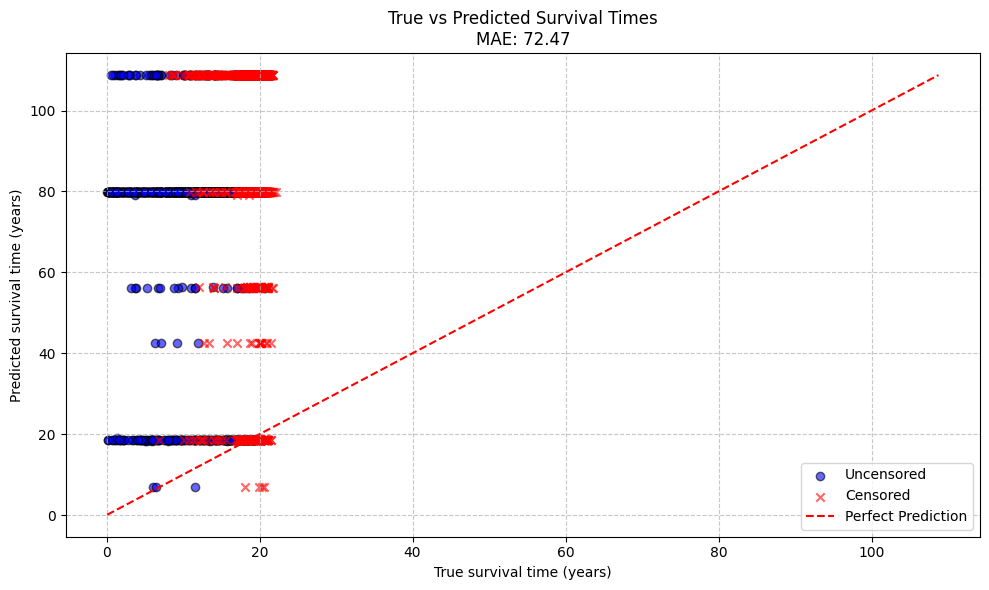

In [53]:
plot_survival_trees(y_pred, y_test)

In [54]:
from dataset.support import SupportDataset

df = pd.read_csv('data/support2.csv')
data = SupportDataset(df)
X_train, X_test, y_train, y_test = data.get_train_test()

X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = data.get_train_test_xgboost()

/mnt/c/Users/rizki/Master Files/ThesisUMCG/Survival-Tree-Analysis/src/dataset/support.py:101: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data.replace({False: 0, True: 1}, inplace=True)


In [55]:
best_tree_dir = 'calibration-support.json'
best_tree = AFTSurvivalTree.load(best_tree_dir)

In [56]:
best_tree._score(X_test, y_test)

np.float64(0.5159499784909473)

In [57]:
y_pred = best_tree.predict(X_test)

y_true: (1821,), y_pred: (1821,), censored: (1821,)


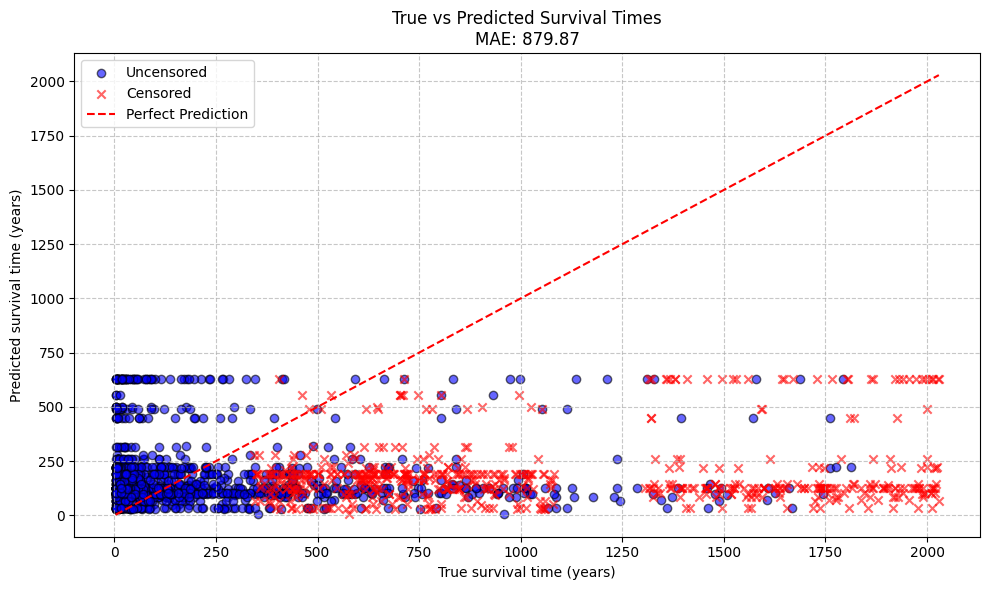

In [58]:
plot_survival_trees(y_pred, y_test)

In [68]:
from dataset.veteran import VeteranLungDataset

df = pd.read_csv('data/veterans_lung_cancer.csv')
data = VeteranLungDataset(df)
X_train, X_test, y_train, y_test = data.get_train_test()

In [73]:
best_aft_dir = "calibration-forest"
best_aft_model = AFTForest.load(best_aft_dir)

In [74]:
best_aft_model._score(X_test, y_test)

np.float64(0.3873626373626374)

In [75]:
y_pred = best_aft_model.predict(X_test)

y_true: (28,), y_pred: (28,), censored: (28,)


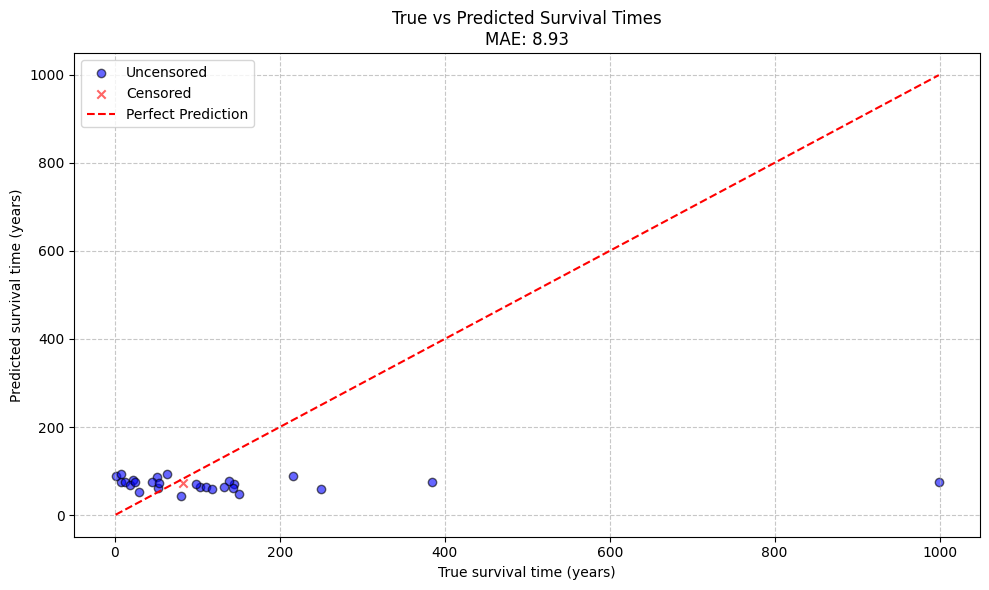

In [76]:
plot_survival_trees(y_pred, y_test)